In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/422/train.csv')
# df = pd.read_csv('/content/train.csv')

df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

# *Preprocessing*

## **Counting no. of 0 in a column and discarding columns with most of the values 0**

In [ ]:
for column_name in df.columns:
    column = df[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Id  is :  0
Count of zeros in column  MSSubClass  is :  0
Count of zeros in column  MSZoning  is :  0
Count of zeros in column  LotFrontage  is :  0
Count of zeros in column  LotArea  is :  0
Count of zeros in column  Street  is :  0
Count of zeros in column  Alley  is :  0
Count of zeros in column  LotShape  is :  0
Count of zeros in column  LandContour  is :  0
Count of zeros in column  Utilities  is :  0
Count of zeros in column  LotConfig  is :  0
Count of zeros in column  LandSlope  is :  0
Count of zeros in column  Neighborhood  is :  0
Count of zeros in column  Condition1  is :  0
Count of zeros in column  Condition2  is :  0
Count of zeros in column  BldgType  is :  0
Count of zeros in column  HouseStyle  is :  0
Count of zeros in column  OverallQual  is :  0
Count of zeros in column  OverallCond  is :  0
Count of zeros in column  YearBuilt  is :  0
Count of zeros in column  YearRemodAdd  is :  0
Count of zeros in column  RoofStyle  is :  0
Count of ze

In [ ]:
df = df.drop(['Id', 'MiscVal', 'PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF','Fireplaces','HalfBath','BsmtHalfBath','BsmtFullBath','LowQualFinSF','2ndFlrSF','BsmtFinSF2','BsmtFinSF1','MasVnrArea'], axis = 1)

In [ ]:
df.shape

(1460, 64)

## **Counting no. of null in a column and discarding columns with most of the values Null**

In [ ]:
for column_name in df.columns:
  print('Count of Null in column ', column_name, ' is : ', df[column_name].isna().sum())

Count of Null in column  MSSubClass  is :  0
Count of Null in column  MSZoning  is :  0
Count of Null in column  LotFrontage  is :  259
Count of Null in column  LotArea  is :  0
Count of Null in column  Street  is :  0
Count of Null in column  Alley  is :  1369
Count of Null in column  LotShape  is :  0
Count of Null in column  LandContour  is :  0
Count of Null in column  Utilities  is :  0
Count of Null in column  LotConfig  is :  0
Count of Null in column  LandSlope  is :  0
Count of Null in column  Neighborhood  is :  0
Count of Null in column  Condition1  is :  0
Count of Null in column  Condition2  is :  0
Count of Null in column  BldgType  is :  0
Count of Null in column  HouseStyle  is :  0
Count of Null in column  OverallQual  is :  0
Count of Null in column  OverallCond  is :  0
Count of Null in column  YearBuilt  is :  0
Count of Null in column  YearRemodAdd  is :  0
Count of Null in column  RoofStyle  is :  0
Count of Null in column  RoofMatl  is :  0
Count of Null in colum

In [ ]:
df = df.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley','YrSold','MoSold'], axis = 1)

## **Dropping rows with null values**

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(1094, 57)

In [ ]:
df.head(100)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,"2,003.00",RFn,2,548,TA,TA,Y,WD,Normal,208500
1,20,RL,80.00,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,"1,976.00",RFn,2,460,TA,TA,Y,WD,Normal,181500
2,60,RL,68.00,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,"2,001.00",RFn,2,608,TA,TA,Y,WD,Normal,223500
3,70,RL,60.00,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,"1,998.00",Unf,3,642,TA,TA,Y,WD,Abnorml,140000
4,60,RL,84.00,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,"2,000.00",RFn,3,836,TA,TA,Y,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,60,RL,69.00,7590,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,"1,966.00",RFn,2,453,TA,TA,Y,WD,Normal,155000
129,20,RL,69.00,8973,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,"1,998.00",RFn,2,750,TA,TA,Y,WD,Abnorml,150000
130,60,RL,88.00,14200,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,"1,966.00",Fin,2,487,TA,TA,Y,WD,Normal,226000
132,20,RL,75.00,7388,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,"1,974.00",Unf,2,624,TA,TA,Y,WD,Normal,150750


## **Imputing missing values of the ones possible**

<Axes: >

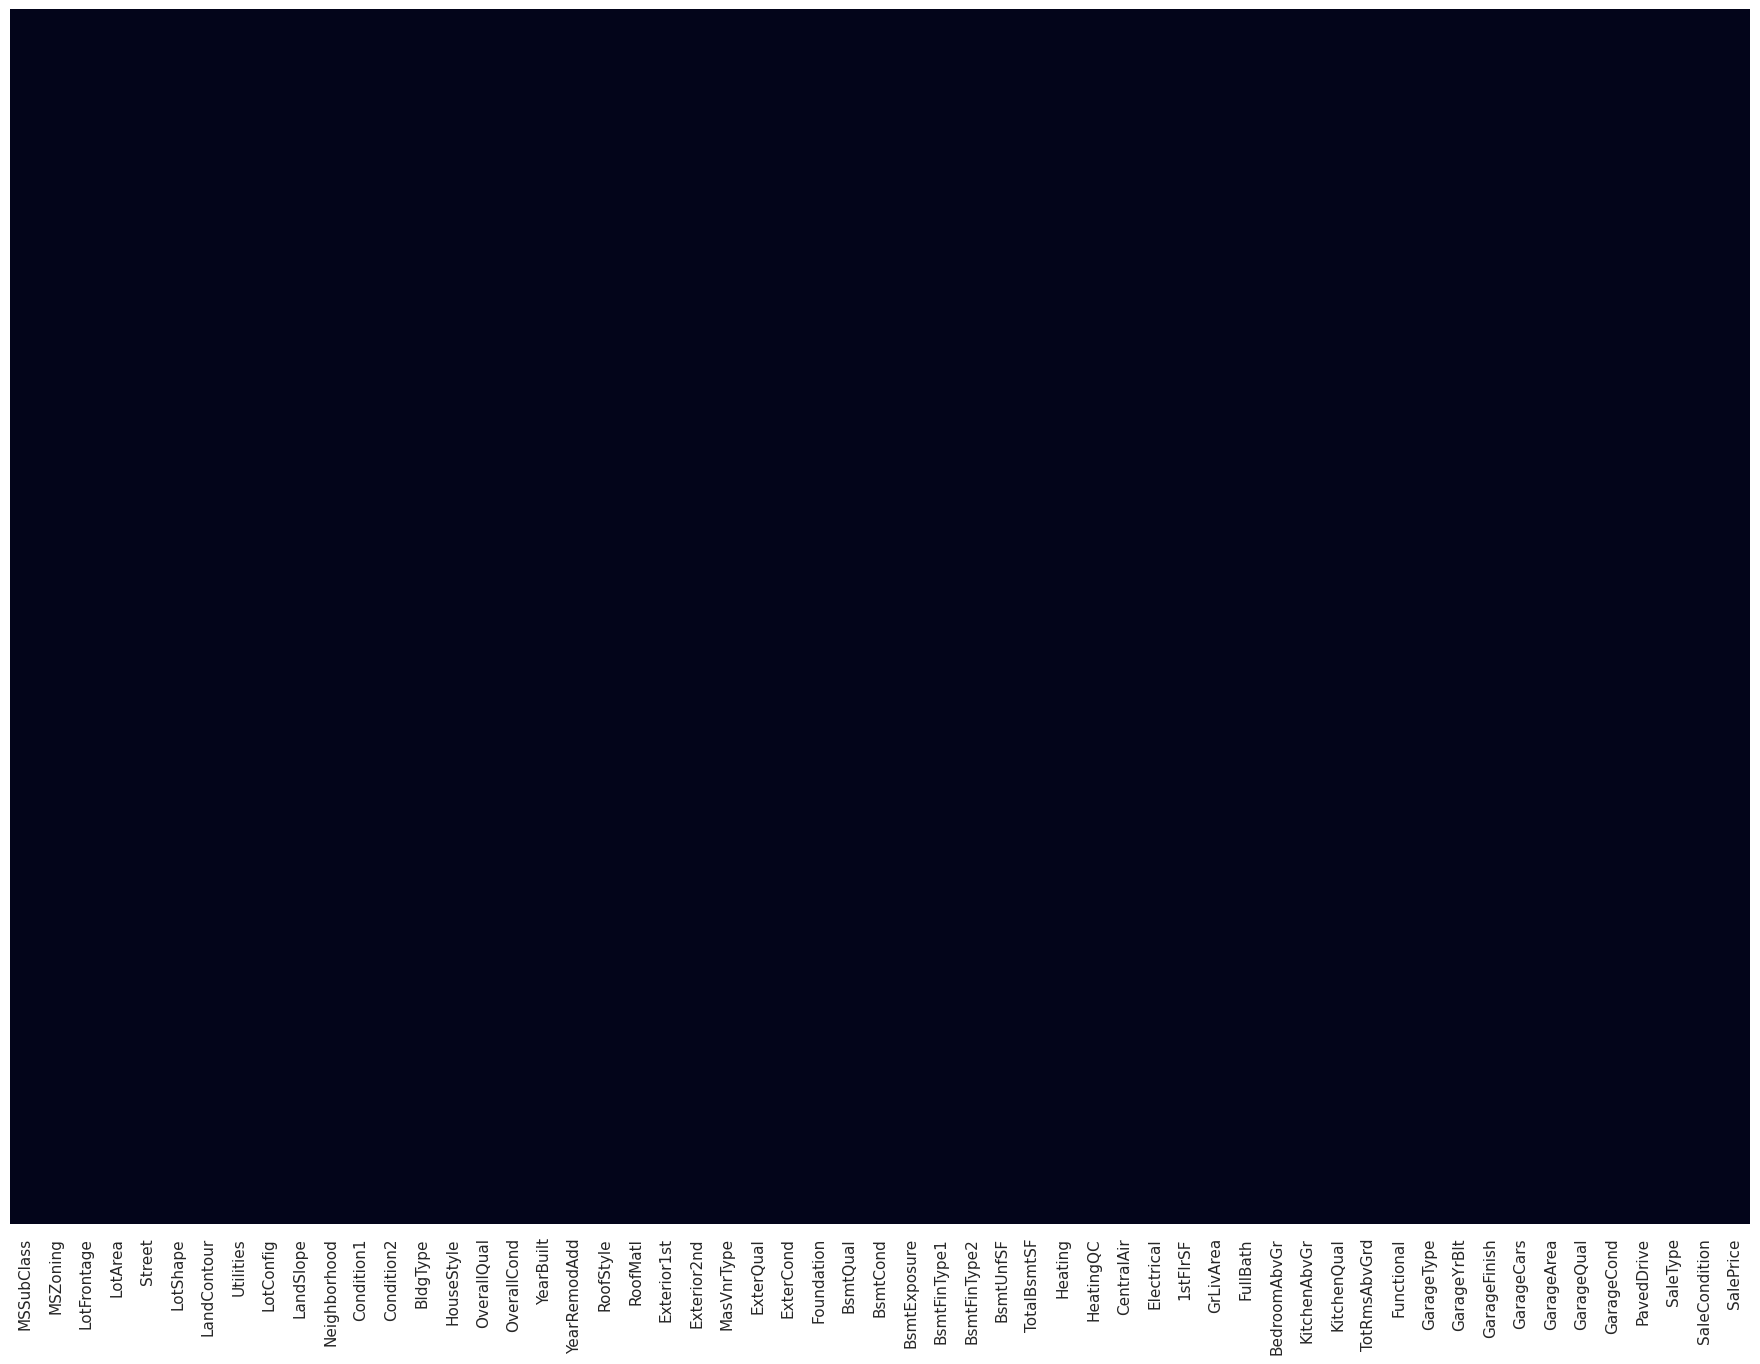

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(df[['LotFrontage']])

df['LotFrontage'] = impute.transform(df[['LotFrontage']])

In [ ]:
df.head(100)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,"2,003.00",RFn,2,548,TA,TA,Y,WD,Normal,208500
1,20,RL,80.00,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,"1,976.00",RFn,2,460,TA,TA,Y,WD,Normal,181500
2,60,RL,68.00,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,"2,001.00",RFn,2,608,TA,TA,Y,WD,Normal,223500
3,70,RL,60.00,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,"1,998.00",Unf,3,642,TA,TA,Y,WD,Abnorml,140000
4,60,RL,84.00,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,"2,000.00",RFn,3,836,TA,TA,Y,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,60,RL,69.00,7590,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,"1,966.00",RFn,2,453,TA,TA,Y,WD,Normal,155000
129,20,RL,69.00,8973,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,"1,998.00",RFn,2,750,TA,TA,Y,WD,Abnorml,150000
130,60,RL,88.00,14200,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,"1,966.00",Fin,2,487,TA,TA,Y,WD,Normal,226000
132,20,RL,75.00,7388,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,"1,974.00",Unf,2,624,TA,TA,Y,WD,Normal,150750


## **Encoding categorical values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   object 
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   object 
 5   LotShape       1094 non-null   object 
 6   LandContour    1094 non-null   object 
 7   Utilities      1094 non-null   object 
 8   LotConfig      1094 non-null   object 
 9   LandSlope      1094 non-null   object 
 10  Neighborhood   1094 non-null   object 
 11  Condition1     1094 non-null   object 
 12  Condition2     1094 non-null   object 
 13  BldgType       1094 non-null   object 
 14  HouseStyle     1094 non-null   object 
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemo

In [ ]:
# x = df.drop('SalePrice',axis=1)
# y = df['SalePrice']

In [ ]:
# x = pd.get_dummies(x, columns = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'])

In [ ]:
# x.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df1 = df.select_dtypes(include = ['object'])
df1

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [ ]:
labelencoder = LabelEncoder()

In [ ]:
for column_name in df1.columns:
  df[column_name]= labelencoder.fit_transform(df[column_name])

In [ ]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,60,3,65.00,8450,1,3,3,0,4,0,...,"2,003.00",1,2,548,4,4,2,8,4,208500
1,20,3,80.00,9600,1,3,3,0,2,0,...,"1,976.00",1,2,460,4,4,2,8,4,181500
2,60,3,68.00,11250,1,0,3,0,4,0,...,"2,001.00",1,2,608,4,4,2,8,4,223500
3,70,3,60.00,9550,1,0,3,0,0,0,...,"1,998.00",2,3,642,4,4,2,8,0,140000
4,60,3,84.00,14260,1,0,3,0,2,0,...,"2,000.00",1,3,836,4,4,2,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.00,7917,1,3,3,0,4,0,...,"1,999.00",1,2,460,4,4,2,8,4,175000
1456,20,3,85.00,13175,1,3,3,0,4,0,...,"1,978.00",2,2,500,4,4,2,8,4,210000
1457,70,3,66.00,9042,1,3,3,0,4,0,...,"1,941.00",1,1,252,4,4,2,8,4,266500
1458,20,3,68.00,9717,1,3,3,0,4,0,...,"1,950.00",2,1,240,4,4,2,8,4,142125


# *Visualization*

count     1,094.00
mean    187,033.26
std      83,165.33
min      35,311.00
25%     132,500.00
50%     165,750.00
75%     221,000.00
max     755,000.00
Name: SalePrice, dtype: float64


<ipython-input-468-ac8c612472ca>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g');


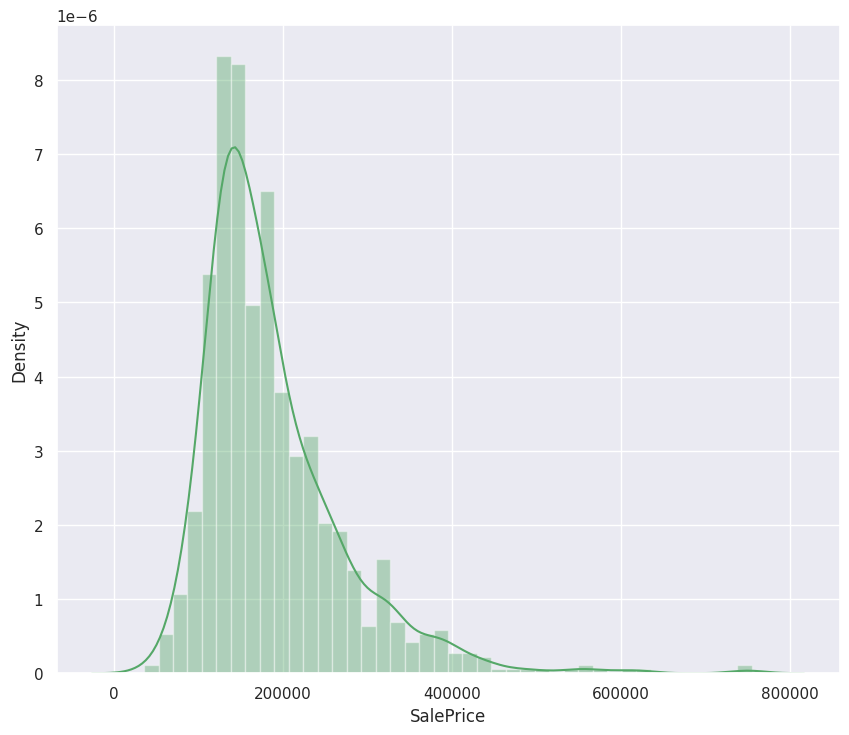

In [ ]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g');

<Axes: xlabel='SalePrice', ylabel='Density'>

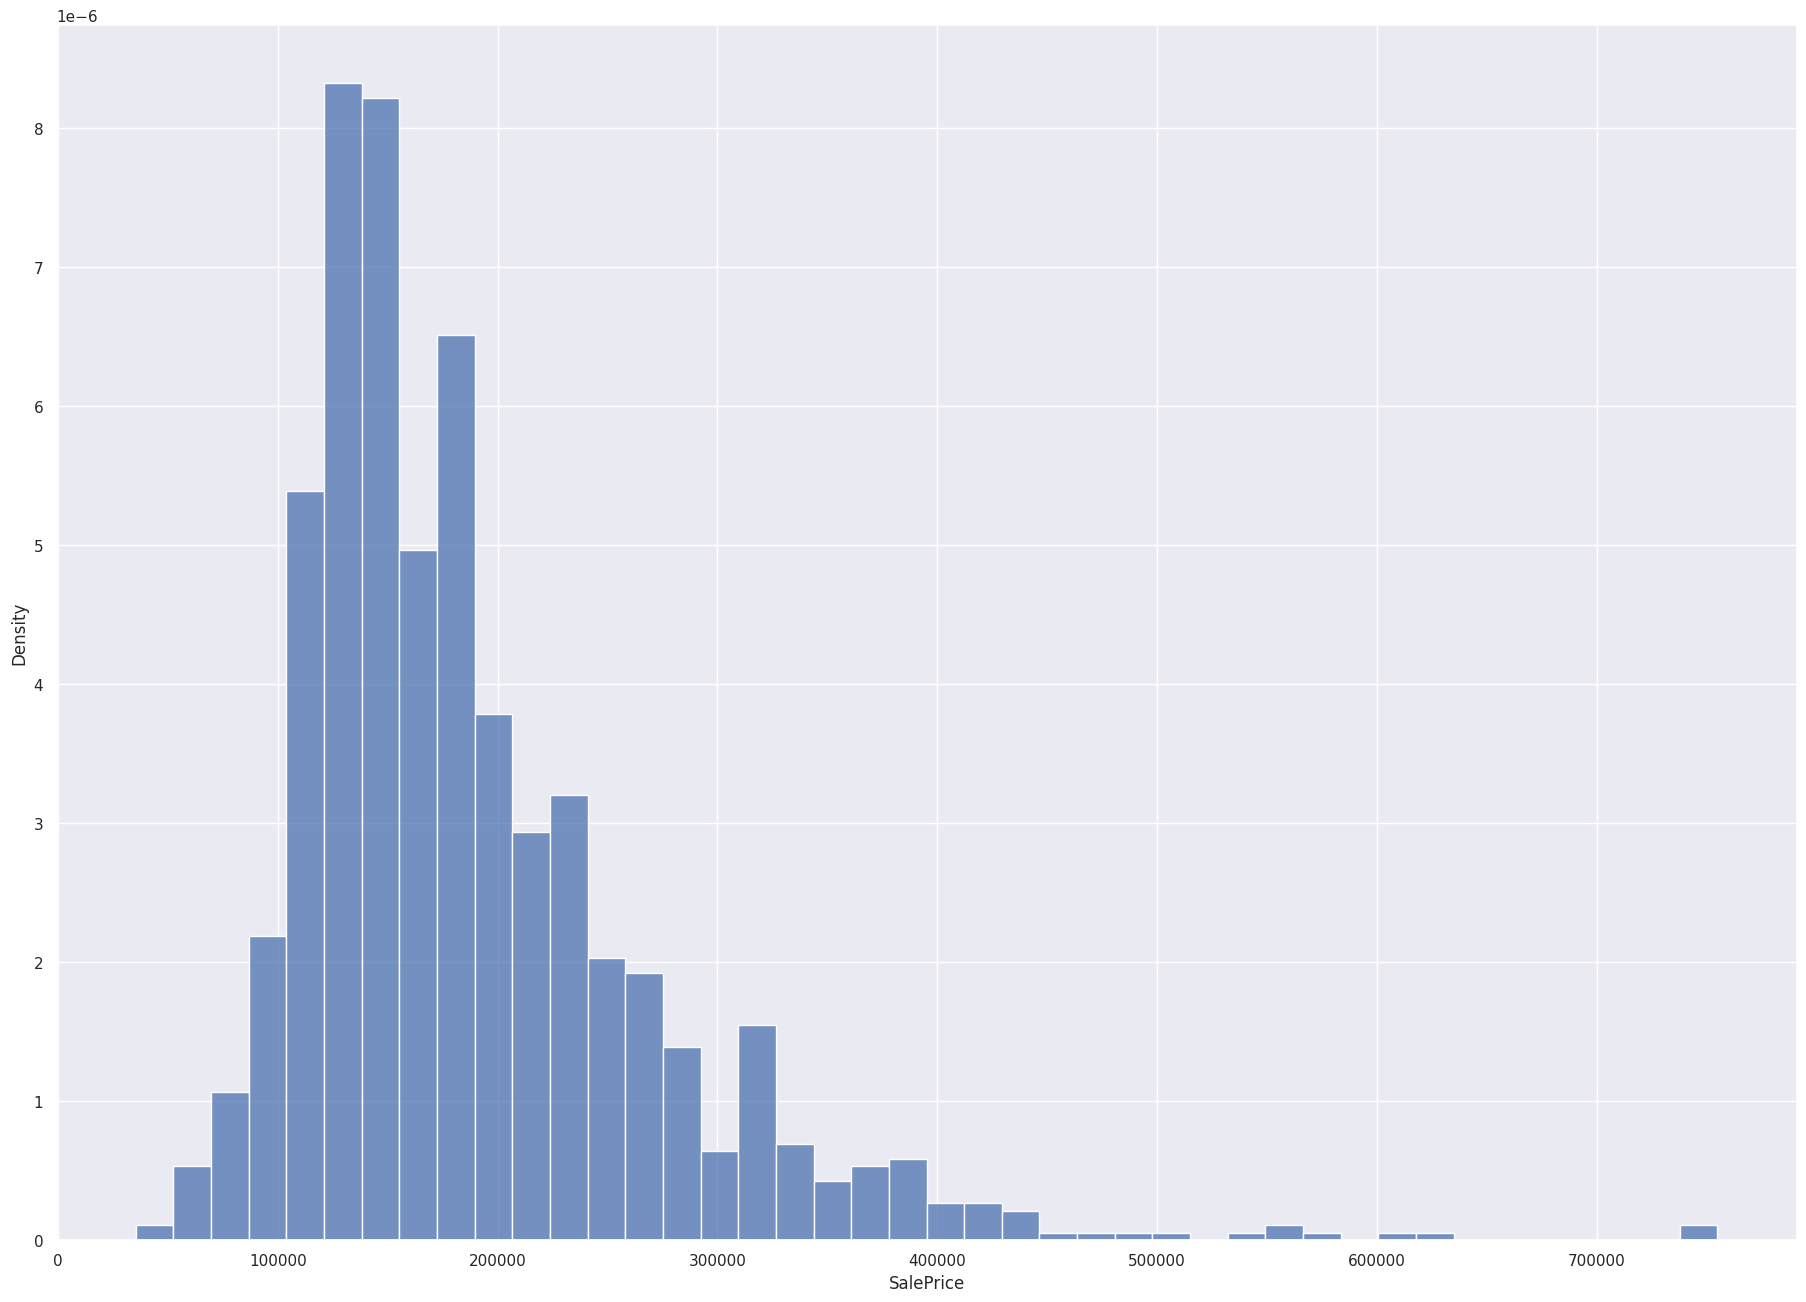

In [ ]:
sns.histplot(df["SalePrice"], stat="density")

**the output variable looks pretty evenly distributed so its safe to say there are no outliers**

<Axes: >

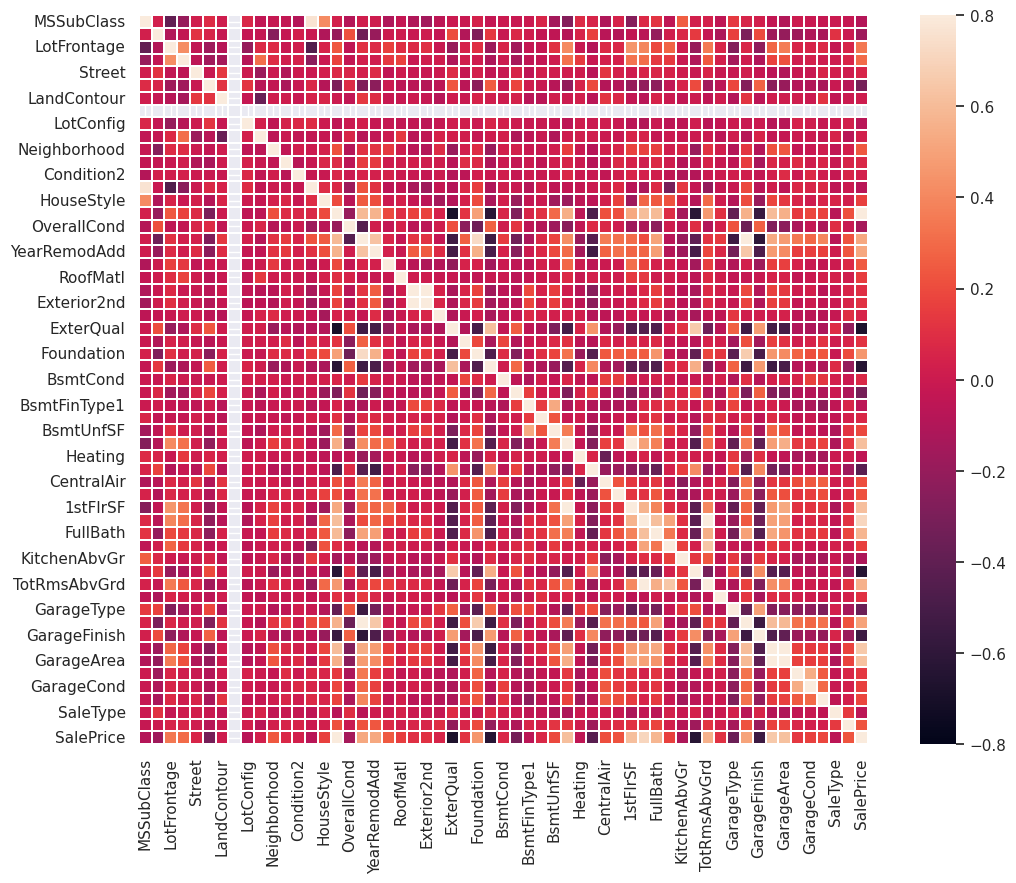

In [ ]:
corr_train = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
# Mask the upper part of the heatmap
# mask = np.triu(np.ones_like(corr_train, dtype = bool))
sns.heatmap(corr_train, vmax = .8, vmin = -.8, linewidths = 0.1,
            annot_kws = {"size": 10, "color": "black"}, square = True)

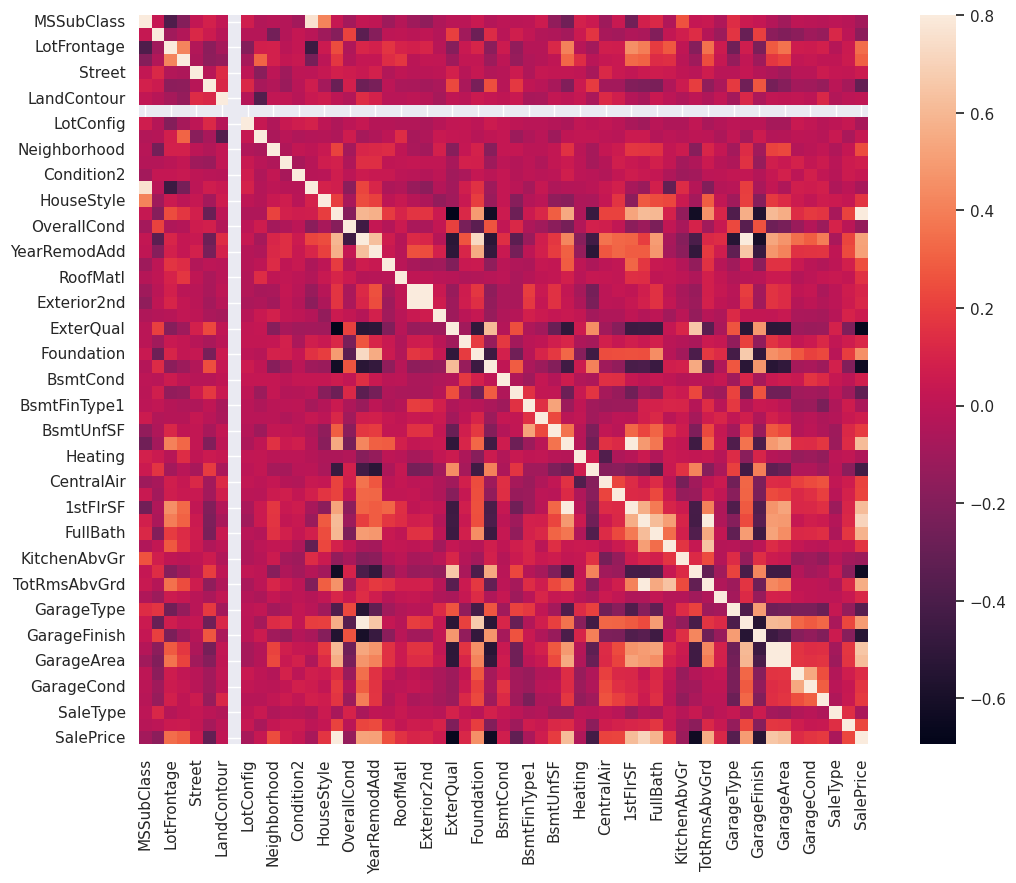

In [ ]:
corr_test = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_test, vmax = .8, square = True);

In [ ]:
def plotting_chart(df, feature):
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating customized chart
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    ## Grid of 3 cols and 3 rows
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)

    ## Customized histogram grid
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    # plot histogram
    sns.distplot(df.loc[:,feature], norm_hist = True, ax = ax1)



    ## Customized QQ_plot
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    # plot histogram
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customized boxplot
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:, feature], orient = 'v', ax = ax3)

<ipython-input-472-55b80b8a302a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist = True, ax = ax1)


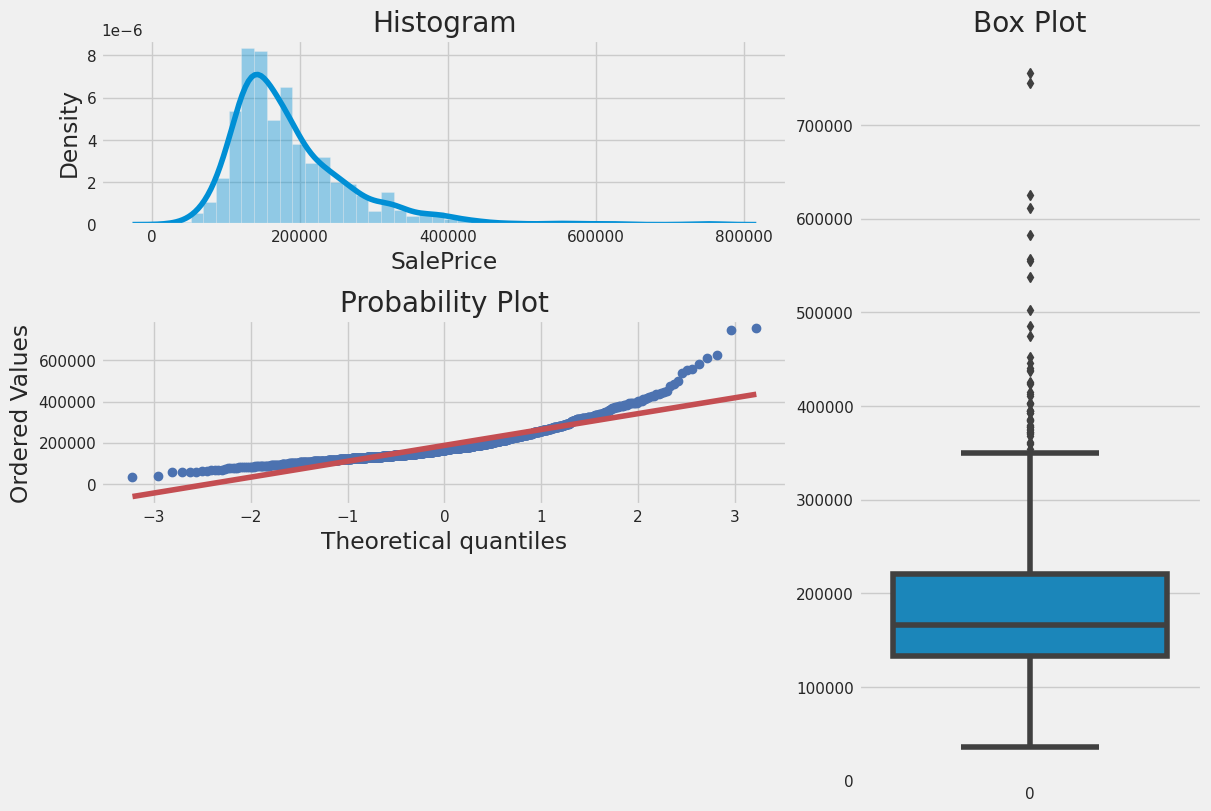

In [ ]:
plotting_chart(df, 'SalePrice')

# Numerical Data Analyze

In [ ]:
# All the number columns
train_num = df.select_dtypes(include = [np.number])
#test_num = test.select_dtypes(include = [np.number])

train_num.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,60,3,65.00,8450,1,3,3,0,4,0,...,"2,003.00",1,2,548,4,4,2,8,4,208500
1,20,3,80.00,9600,1,3,3,0,2,0,...,"1,976.00",1,2,460,4,4,2,8,4,181500
2,60,3,68.00,11250,1,0,3,0,4,0,...,"2,001.00",1,2,608,4,4,2,8,4,223500
3,70,3,60.00,9550,1,0,3,0,0,0,...,"1,998.00",2,3,642,4,4,2,8,0,140000
4,60,3,84.00,14260,1,0,3,0,2,0,...,"2,000.00",1,3,836,4,4,2,8,4,250000


In [ ]:
train_numeric = [col for col in df.columns if df[col].dtypes != 'object']
print("Numeric Features:", train_numeric)
print(f"\nTotal Numeric Features: {len(train_numeric)}")

Numeric Features: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice']

Total Numeric Features: 57


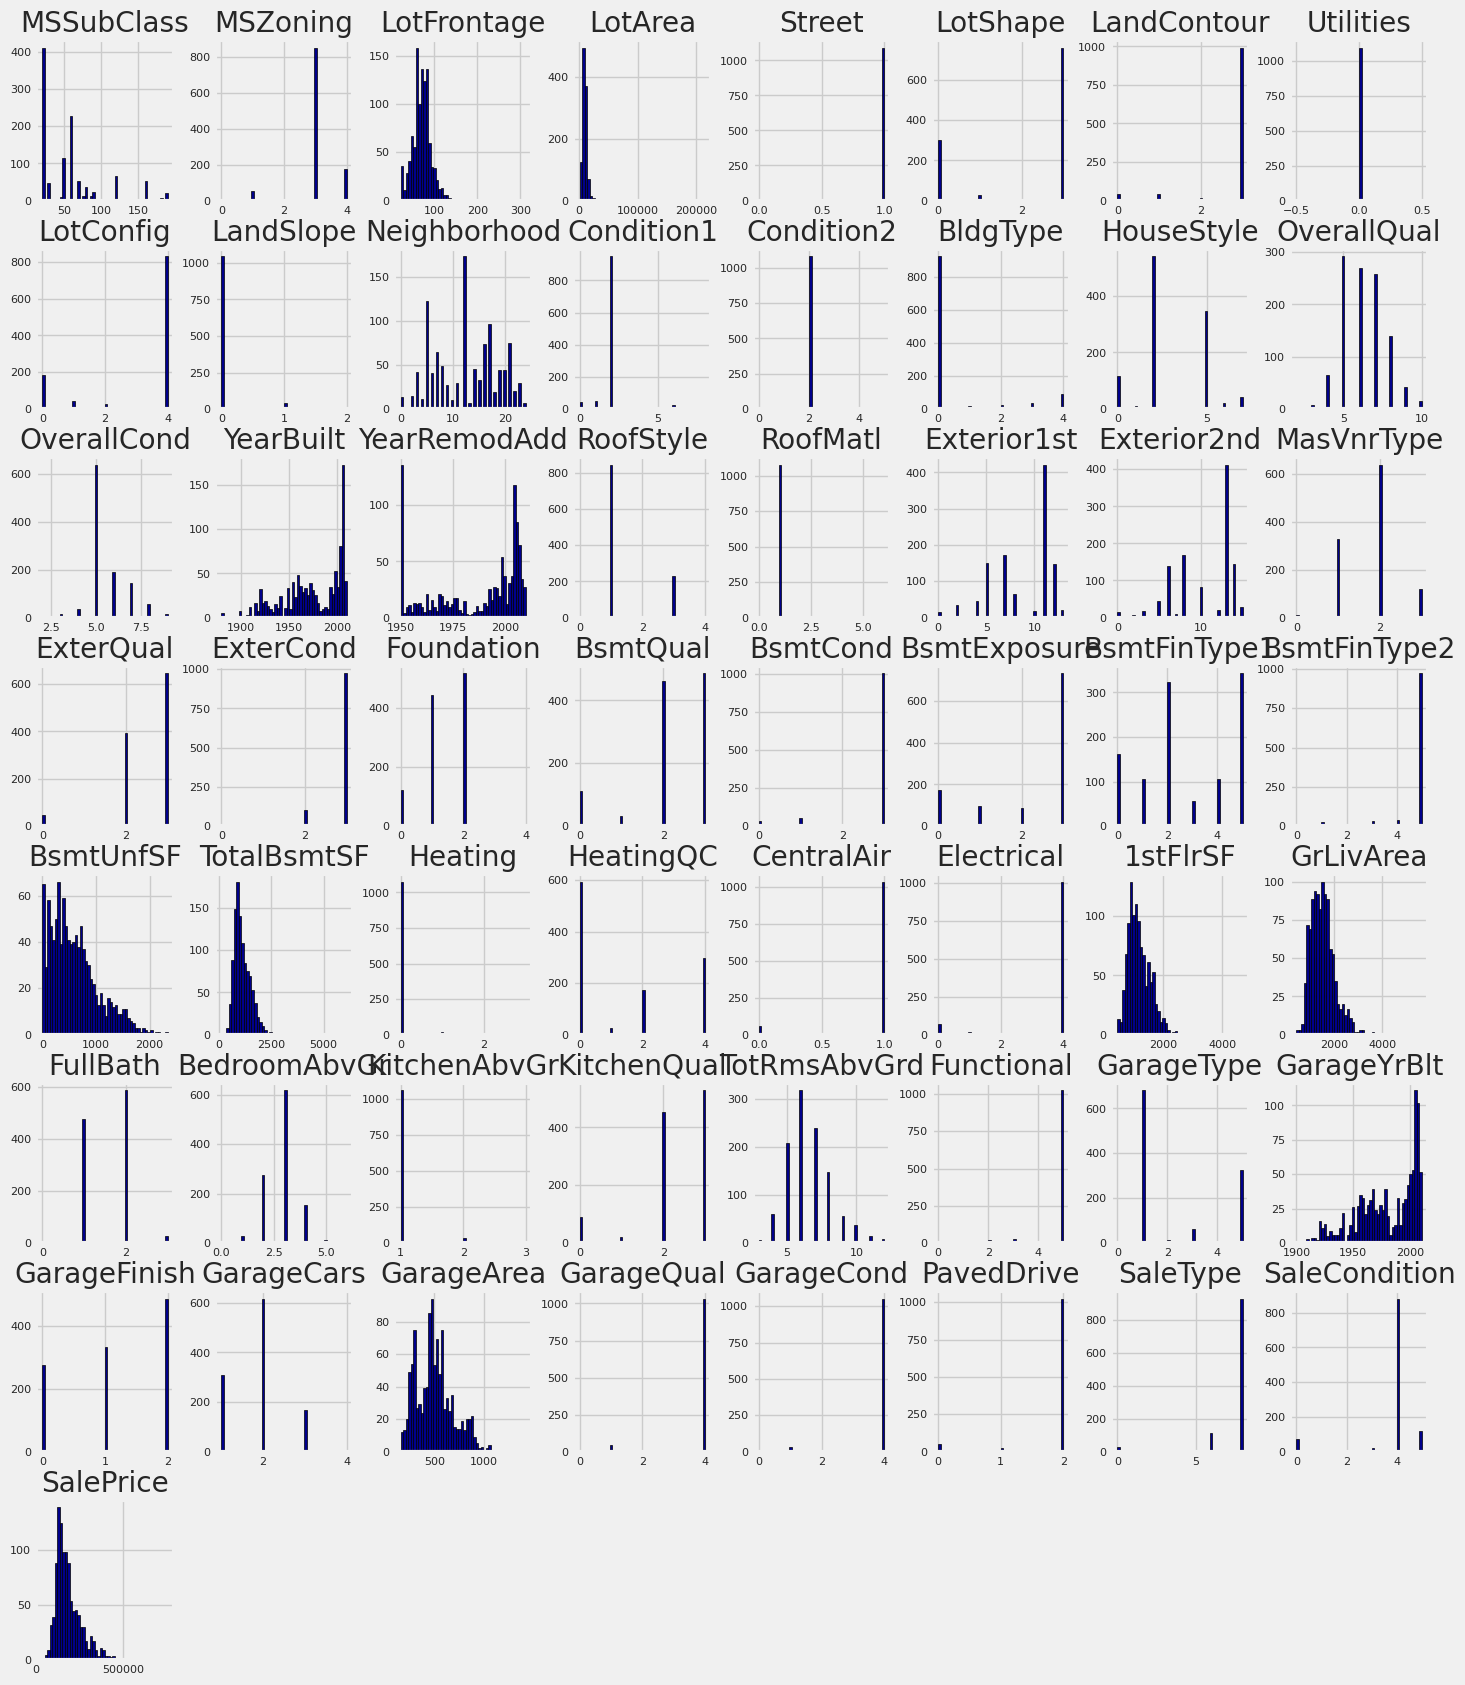

In [ ]:
# Plot the distribution of all the numerical features
fig_ = train_num.hist(figsize = (16, 20), bins = 50, color = "darkblue",
                           edgecolor = "black", xlabelsize = 8, ylabelsize = 8)

# Quasi Constant Feature

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Dropping Quasi Constant Feature which has 93% similar or constant value
selector = VarianceThreshold(threshold = 0.07)
sel = selector.fit(train_num.iloc[:, :-1]) # excludes the last column
sel_index = sel.get_support() # mask that can be applied

print(f"Number of features to be keeped: {sum(sel_index)}\n")
quasi_features = len(train_num.iloc[:, :-1].columns) - sum(sel_index)
print(f"Number of quasi_constant features: {quasi_features}")

QC_features_list = [x for x in train_num.iloc[:, :-1].columns
                        if x not in train_num.iloc[:, :-1].columns[sel_index]]
print(f"\nQuasi-constant features to be dropped: {QC_features_list}")

Number of features to be keeped: 49

Number of quasi_constant features: 7

Quasi-constant features to be dropped: ['Street', 'Utilities', 'LandSlope', 'Condition2', 'Heating', 'CentralAir', 'KitchenAbvGr']


In [ ]:
df.shape

(1094, 57)

In [ ]:
# for i in range (0,len(QC_features_list)):
#   ql = QC_features_list[i]
#   df = df.drop([ql], axis = 1)

In [ ]:
df.shape

(1094, 57)

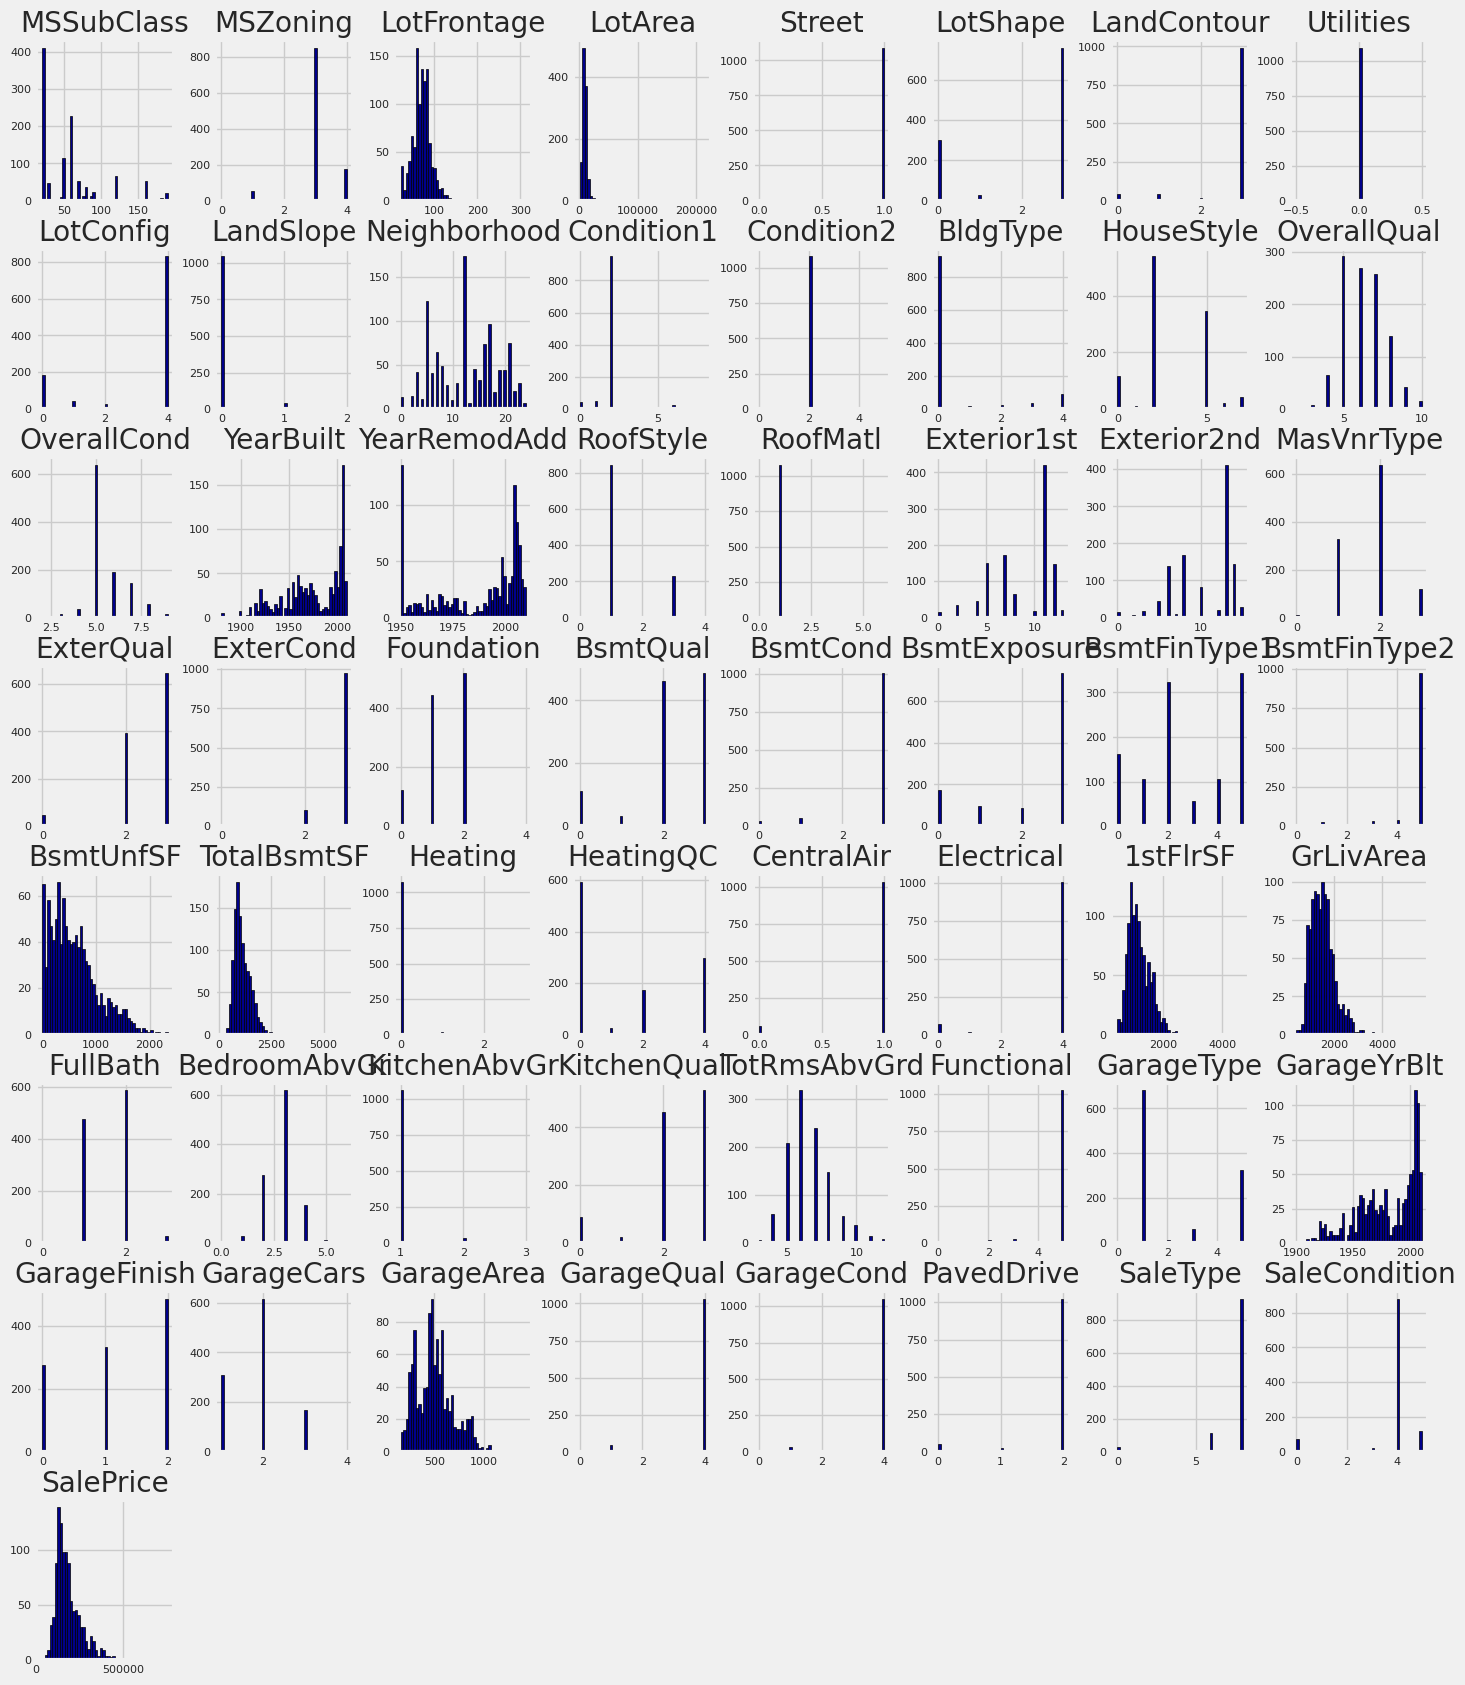

In [ ]:
fig_ = train_num.hist(figsize = (16, 20), bins = 50, color = "darkblue",
                           edgecolor = "black", xlabelsize = 8, ylabelsize = 8)

<Axes: >

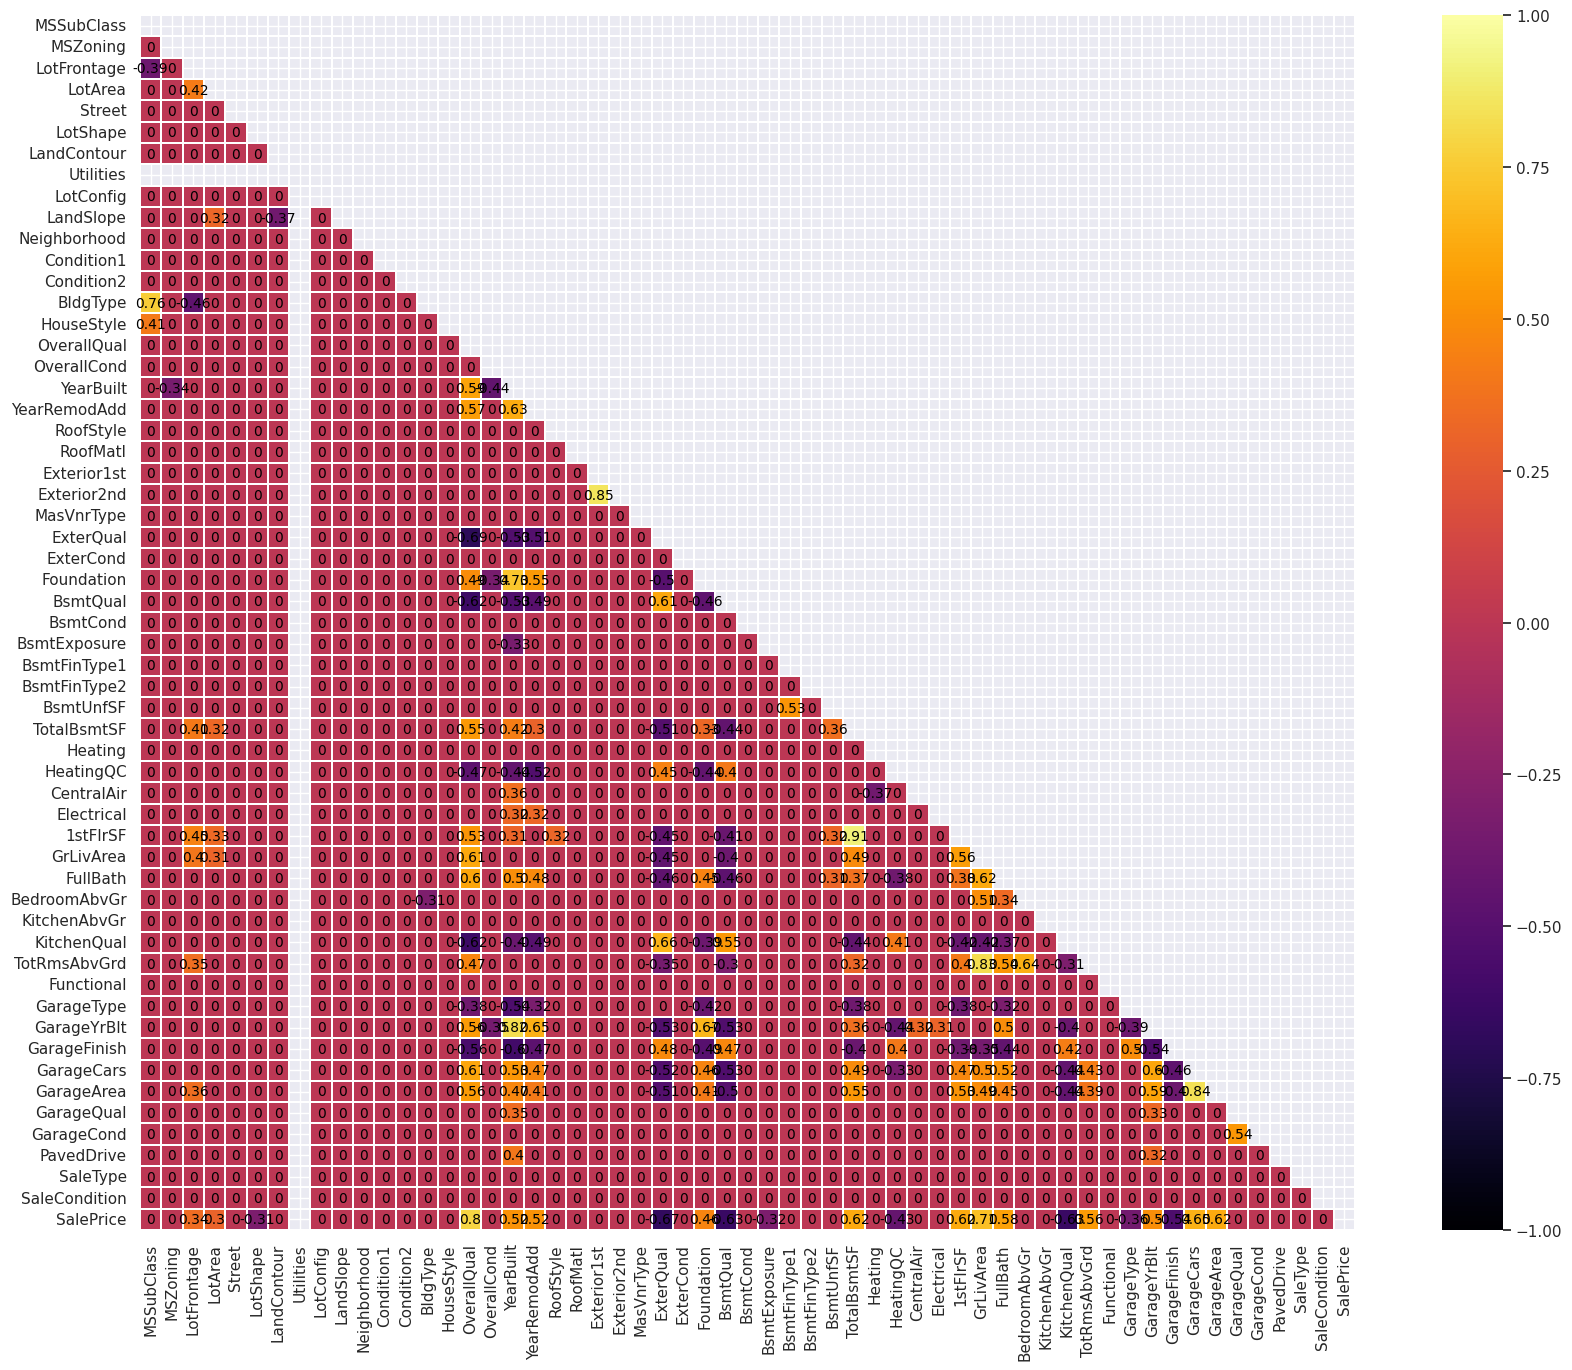

In [ ]:
corr_matrix = train_num.corr()
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0


# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format
# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

cmap = "inferno"

# plot the heatmap
sns.set(rc = {'figure.figsize':(20, 15)})
sns.heatmap(corr_matrix, mask = mask, vmax = 1.0, vmin = -1.0, linewidths = 0.1,
            annot_kws = {"size": 10, "color": "black"}, square = True, cmap = cmap, annot = True)

In [ ]:
corr_data = (train_num.corr())["SalePrice"].sort_values(ascending = False)
corr_data

SalePrice        1.00
OverallQual      0.80
GrLivArea        0.71
GarageCars       0.65
GarageArea       0.62
TotalBsmtSF      0.62
1stFlrSF         0.62
FullBath         0.58
TotRmsAbvGrd     0.56
YearBuilt        0.52
YearRemodAdd     0.52
GarageYrBlt      0.50
Foundation       0.46
LotFrontage      0.34
LotArea          0.30
RoofStyle        0.25
Neighborhood     0.24
SaleCondition    0.23
Electrical       0.22
CentralAir       0.21
BsmtUnfSF        0.19
PavedDrive       0.18
HouseStyle       0.17
BedroomAbvGr     0.17
GarageCond       0.17
RoofMatl         0.15
GarageQual       0.13
ExterCond        0.11
Exterior2nd      0.11
Functional       0.11
Exterior1st      0.10
Condition1       0.07
BsmtCond         0.07
BsmtFinType2     0.07
Street           0.06
MasVnrType       0.05
Condition2       0.03
LandSlope        0.03
LandContour      0.01
Heating         -0.05
SaleType        -0.06
BsmtFinType1    -0.06
BldgType        -0.07
LotConfig       -0.07
MSSubClass      -0.09
KitchenAbv

In [ ]:
corr_data_with_SalePrice = train_num.corr()["SalePrice"][:-1] # Leaving out SalePrice

high_corr_list = (corr_data_with_SalePrice[abs(corr_data_with_SalePrice) >= 0.5].sort_values(ascending = False).round(2))
low_corr_list = (corr_data_with_SalePrice[(abs(corr_data_with_SalePrice) < 0.5) & (abs(corr_data_with_SalePrice) > 0.3)].sort_values(ascending = False).round(2))


print(f"{len(high_corr_list)} high correlated values with SalePrice:\n{high_corr_list}\n")
print(f"{len(low_corr_list)} low correlated values with SalePrice:\n{low_corr_list}\n")

15 high correlated values with SalePrice:
OverallQual     0.80
GrLivArea       0.71
GarageCars      0.65
GarageArea      0.62
TotalBsmtSF     0.62
1stFlrSF        0.62
FullBath        0.58
TotRmsAbvGrd    0.56
YearBuilt       0.52
YearRemodAdd    0.52
GarageYrBlt     0.50
GarageFinish   -0.54
BsmtQual       -0.63
KitchenQual    -0.63
ExterQual      -0.67
Name: SalePrice, dtype: float64

7 low correlated values with SalePrice:
Foundation      0.46
LotFrontage     0.34
LotArea         0.30
LotShape       -0.31
BsmtExposure   -0.32
GarageType     -0.36
HeatingQC      -0.43
Name: SalePrice, dtype: float64



In [ ]:
poor_corr_list = (corr_data_with_SalePrice[abs(corr_data_with_SalePrice) < 0.3].sort_values(ascending = False).round(2))
print(f"{len(poor_corr_list)} poor correlated values with SalePrice:\n{poor_corr_list}\n")

33 poor correlated values with SalePrice:
RoofStyle        0.25
Neighborhood     0.24
SaleCondition    0.23
Electrical       0.22
CentralAir       0.21
BsmtUnfSF        0.19
PavedDrive       0.18
HouseStyle       0.17
BedroomAbvGr     0.17
GarageCond       0.17
RoofMatl         0.15
GarageQual       0.13
ExterCond        0.11
Exterior2nd      0.11
Functional       0.11
Exterior1st      0.10
Condition1       0.07
BsmtCond         0.07
BsmtFinType2     0.07
Street           0.06
MasVnrType       0.05
Condition2       0.03
LandSlope        0.03
LandContour      0.01
Heating         -0.05
SaleType        -0.06
BsmtFinType1    -0.06
BldgType        -0.07
LotConfig       -0.07
MSSubClass      -0.09
KitchenAbvGr    -0.12
OverallCond     -0.14
MSZoning        -0.17
Name: SalePrice, dtype: float64



In [ ]:
# df = df.drop(['RoofStyle','Neighborhood','SaleCondition','Electrical','MSZoning','OverallCond','KitchenAbvGr','MSSubClass','LotConfig','BldgType','BsmtFinType1','SaleType','Heating','LandContour','Condition2','LandSlope','MasVnrType','Street','BsmtFinType2','BsmtCond','Condition1','Exterior1st','Functional','Exterior2nd','ExterCond','GarageQual','RoofMatl','GarageCond','BedroomAbvGr','HouseStyle','PavedDrive','BsmtUnfSF','CentralAir',], axis =1 )

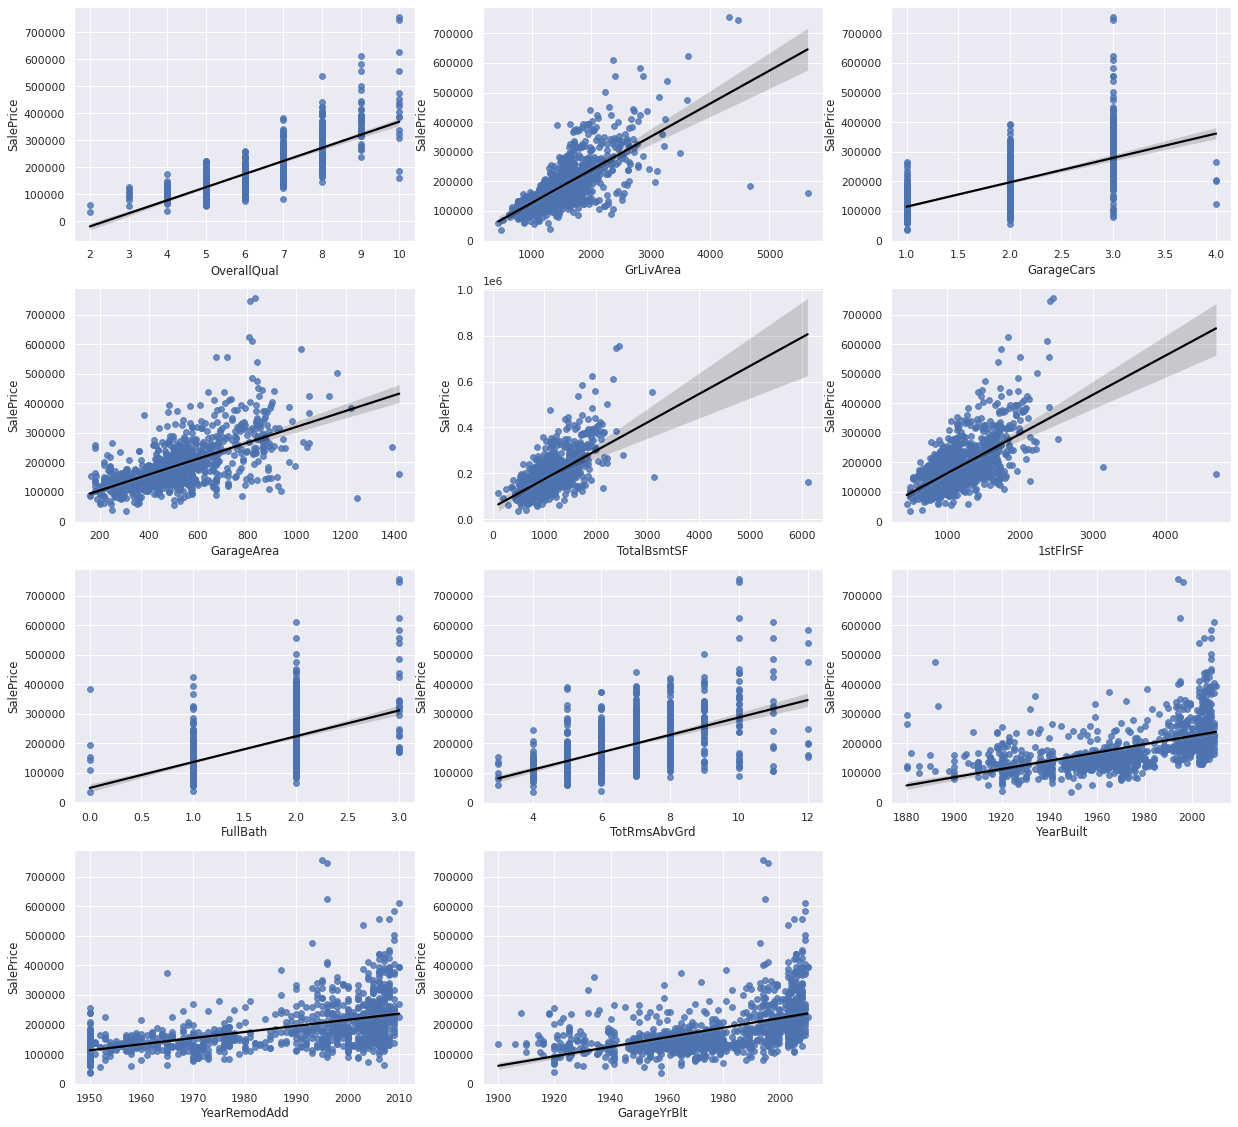

In [ ]:
# High features
high_features = corr_data_with_SalePrice[corr_data_with_SalePrice >= 0.5].sort_values(ascending = False).index

HF_list = [i for i in high_features]
HF_list.append("SalePrice")


def reg_plot(df, features, rows, col):
    fig = plt.figure(figsize = (19,19), dpi = 70)
    for i, feature in enumerate(features):
        if feature != 'SalePrice':
            ax = fig.add_subplot(rows, col, i+1)
            sns.regplot(x = feature, y = 'SalePrice', data = df, line_kws = {'color':'black'})
            ax.set_xlabel(feature)
            ax.set_ylabel('SalePrice')

reg_plot(df[HF_list], HF_list, 4, 3)

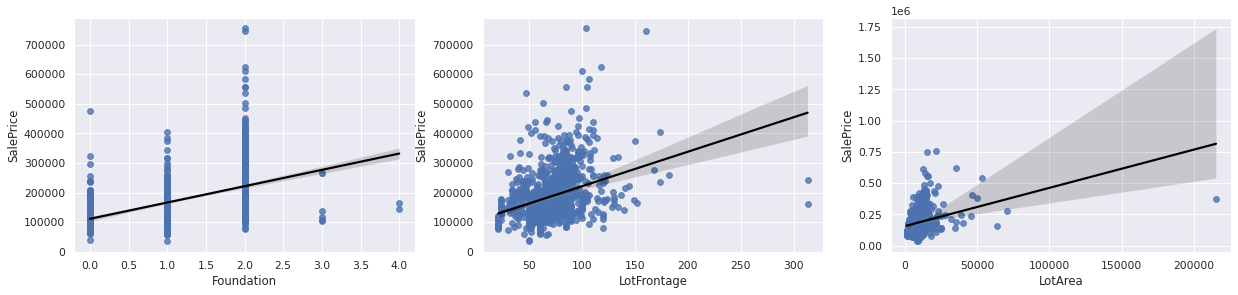

In [ ]:
# High features
low_features = corr_data_with_SalePrice[(corr_data_with_SalePrice < 0.5) & (corr_data_with_SalePrice > 0.3)].sort_values(ascending = False).index

LF_list = [i for i in low_features]
LF_list.append("SalePrice")


def reg_plot(df, features, rows, col):
    fig = plt.figure(figsize = (19,19), dpi = 70)
    for i, feature in enumerate(features):
        if feature != 'SalePrice':
            ax = fig.add_subplot(rows, col, i+1)
            sns.regplot(x = feature, y = 'SalePrice', data = df, line_kws = {'color':'black'})
            ax.set_xlabel(feature)
            ax.set_ylabel('SalePrice')

reg_plot(df[LF_list], LF_list, 4, 3)

# *Training models*

### Train test split

In [ ]:
x = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state=10,shuffle=True)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
pred = neigh.predict(xtest)
pred

array([164668.5, 349000. , 141375. , 119000. ,  96950. , 241000. ,
       373890. , 312500. , 243950. , 164250. , 153000. , 301321.5,
       409390. , 150000. , 140350. , 314000. , 129750. , 115000. ,
       345000. , 132000. , 130750. , 144000. , 188450. , 225000. ,
       196250. , 116250. , 176200. , 249550. , 213200. , 148500. ,
       168000. , 200500. , 272700. , 163950. , 190000. , 190000. ,
        86191.5, 152000. , 280000. , 385000. , 146400. , 112600. ,
       164950. , 104950. , 197000. , 381430.5, 291000. , 249000. ,
       158216. , 208750. , 364150. , 122500. , 185425. , 141250. ,
       133500. , 103000. , 131500. , 179250. , 179620. , 127400. ,
       185500. , 324875. , 151500. , 207187.5, 124000. , 193750. ,
       228950. , 179620. , 215570. , 292750. , 147000. , 149000. ,
       209750. , 160500. , 164668.5, 134000. , 124200. , 183000. ,
       184450. , 149500. , 230895. , 128000. , 350216. , 183917.5,
       295750. , 248750. , 323459.5, 118750. , 140000. , 12890

In [ ]:
score = neigh.score(xtest,ytest)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(ytest, pred)
print("The accuracy of our model is {}%".format (math.floor(score *100)))

The accuracy of our model is 57%


### Randomforest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
pred = regr.predict(xtest)
pred

array([136379.94159508, 205798.28673657, 205798.28673657, 136379.94159508,
       136723.08221137, 153131.51522398, 347369.76143828, 314265.06368602,
       208939.92484061, 139263.07468058, 137807.57880397, 374891.34413422,
       358181.89832054, 136723.08221137, 138841.96851044, 324598.95431326,
       194125.89545705, 136379.94159508, 322773.14407643, 136379.94159508,
       136379.94159508, 136379.94159508, 139263.07468058, 139660.19704281,
       205798.28673657, 136379.94159508, 152734.39286175, 316327.95756999,
       153131.51522398, 193146.70967225, 153131.51522398, 208455.77636637,
       301360.9268212 , 152313.28669161, 205798.28673657, 152734.39286175,
       136379.94159508, 136379.94159508, 276776.48802905, 139660.19704281,
       139263.07468058, 193146.70967225, 205798.28673657, 138139.00596683,
       275810.68433582, 294220.62033676, 303111.23357847, 152734.39286175,
       137807.57880397, 152734.39286175, 318169.06642684, 136379.94159508,
       289608.56805493, 1

In [ ]:
score = regr.score(xtest,ytest)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(ytest, pred)
print("The accuracy of our model is {}%".format (math.floor(score *100)))

The accuracy of our model is 67%


### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
regrr = LinearRegression()

In [ ]:
regrr.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
pred = regrr.predict(xtest)
pred

array([163878.28502871, 309236.39079306, 207605.97927019, 108987.01754127,
       154811.16250594, 193461.97800326, 311748.65050722, 334603.64136876,
       231265.747298  , 156379.79270525, 146822.92254578, 407256.02515303,
       389948.13127579, 113037.74668622, 141854.86249788, 430100.21111555,
       218366.98847353, 125592.49754717, 374671.72151919, 109476.84439481,
       137656.72633694, 113340.78563846, 201517.74422983, 184954.17040343,
       210942.81827151, 114687.79847581, 185939.63543741, 304898.9366257 ,
       140135.31811495, 202453.75035668, 217536.88280768, 231922.25653018,
       247613.90413791, 135077.53027847, 231940.5909946 , 203809.68208443,
       116778.98996995,  49016.59760959, 263070.80827835, 167167.93689556,
       125175.82895959, 123418.35663132, 160067.49272563, 102969.53673826,
       205823.51237722, 309570.88836519, 344375.3280197 , 187293.83137127,
        81733.42322988, 187715.70253151, 296645.18595466, 100538.10018779,
       302969.13687977, 1

In [ ]:
score = regrr.score(xtest,ytest)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(ytest, pred)
print("The accuracy of our model is {}%".format (math.floor(score *100)))

The accuracy of our model is 77%


### XGBRegressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
regressor=XGBRegressor(n_estimators=1100,min_child_weight=1,max_depth=2,learning_rate=0.1,booster='gbtree',base_score=0.25)

In [ ]:
regressor.fit(xtrain,ytrain)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
pred=regressor.predict(xtest)
pred

array([174992.97 , 217354.62 , 190662.2  , 125445.22 , 133028.89 ,
       208772.72 , 311779.84 , 411747.7  , 211553.28 , 174459.45 ,
       132611.64 , 481470.94 , 474854.28 , 109977.15 , 107794.67 ,
       483076.4  , 182692.42 , 139467.58 , 368578.34 , 142826.25 ,
       132034.94 , 129398.18 , 165498.75 , 186880.94 , 190188.8  ,
       118192.4  , 189424.39 , 269903.88 , 177567.53 , 147322.83 ,
       199965.62 , 177003.25 , 289080.75 , 140926.83 , 188211.47 ,
       202629.88 , 121758.03 ,  85798.93 , 234286.06 , 212564.83 ,
       136435.61 , 128807.2  , 175265.67 , 142928.33 , 195557.95 ,
       318735.78 , 388105.3  , 191154.27 , 112485.1  , 192422.62 ,
       358344.7  , 125556.51 , 286971.4  , 150221.75 , 133983.98 ,
       110265.12 , 158887.58 , 233666.27 , 165354.61 , 107416.72 ,
       165855.47 , 255401.28 , 126394.266, 196197.3  , 127451.04 ,
       372887.56 , 205546.95 , 168477.47 , 229597.66 , 190363.83 ,
       146251.7  , 167365.72 , 192331.77 , 147054.58 , 134863.

In [ ]:
score = regressor.score(xtest,ytest)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(ytest, pred)
print("The accuracy of our model is {}%".format (math.floor(score *100)))

The accuracy of our model is 81%


## **Training models after scaling**

### MinMaxScaler

In [ ]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(xtrain)

X_train_scaled = scaler.transform(xtrain)
X_test_scaled = scaler.transform(xtest)

In [ ]:
#train
neigh.fit(X_train_scaled, ytrain)
regr.fit(X_train_scaled, ytrain)
regrr.fit(X_train_scaled, ytrain)
regressor.fit(X_train_scaled, ytrain)

# scoring on the scaled test set
print("Scaled accuracy KNN: {:.2f}".format(
    neigh.score(X_test_scaled, ytest)))
print("Scaled accuracy Randomforest: {:.2f}".format(
    regr.score(X_test_scaled, ytest)))
print("Scaled accuracy Linier Regression: {:.2f}".format(
    regrr.score(X_test_scaled, ytest)))
print("Scaled accuracy XGBregressor: {:.2f}".format(
    regressor.score(X_test_scaled, ytest)))

Scaled accuracy KNN: 0.66
Scaled accuracy Randomforest: 0.68
Scaled accuracy Linier Regression: 0.78
Scaled accuracy XGBregressor: 0.82


### StandardScaler

In [ ]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(xtrain)

X_train_scaledd = scaler.transform(xtrain)
X_test_scaledd = scaler.transform(xtest)

In [ ]:
#train
neigh.fit(X_train_scaledd, ytrain)
regr.fit(X_train_scaledd, ytrain)
regrr.fit(X_train_scaledd, ytrain)
regressor.fit(X_train_scaledd, ytrain)

# scoring on the scaled test set
print("Scaled accuracy KNN: {:.2f}".format(
    neigh.score(X_test_scaledd, ytest)))
print("Scaled accuracy Randomforest: {:.2f}".format(
    regr.score(X_test_scaledd, ytest)))
print("Scaled accuracy Linier Regression: {:.2f}".format(
    regrr.score(X_test_scaledd, ytest)))
print("Scaled accuracy XGBregressor: {:.2f}".format(
    regressor.score(X_test_scaledd, ytest)))

Scaled accuracy KNN: 0.70
Scaled accuracy Randomforest: 0.68
Scaled accuracy Linier Regression: 0.78
Scaled accuracy XGBregressor: 0.82
